In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Prodigy intern\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Checking categorical and numerical variables seperately

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
n=df.select_dtypes('number')
n

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [8]:
c=df.select_dtypes('object')
c

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


There are 7 numerical and 5 categorical variables present in the dataset.

Checking for junk datas

In [10]:
for i in df.columns:
    a=df[i].unique()
    print(a)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

There are no junk data present in the dataset.

# Checking for null values

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Value Treatment

In [13]:
df.skew()

C:\Users\parth\AppData\Local\Temp\ipykernel_9228\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [14]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [15]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Checking for outliers

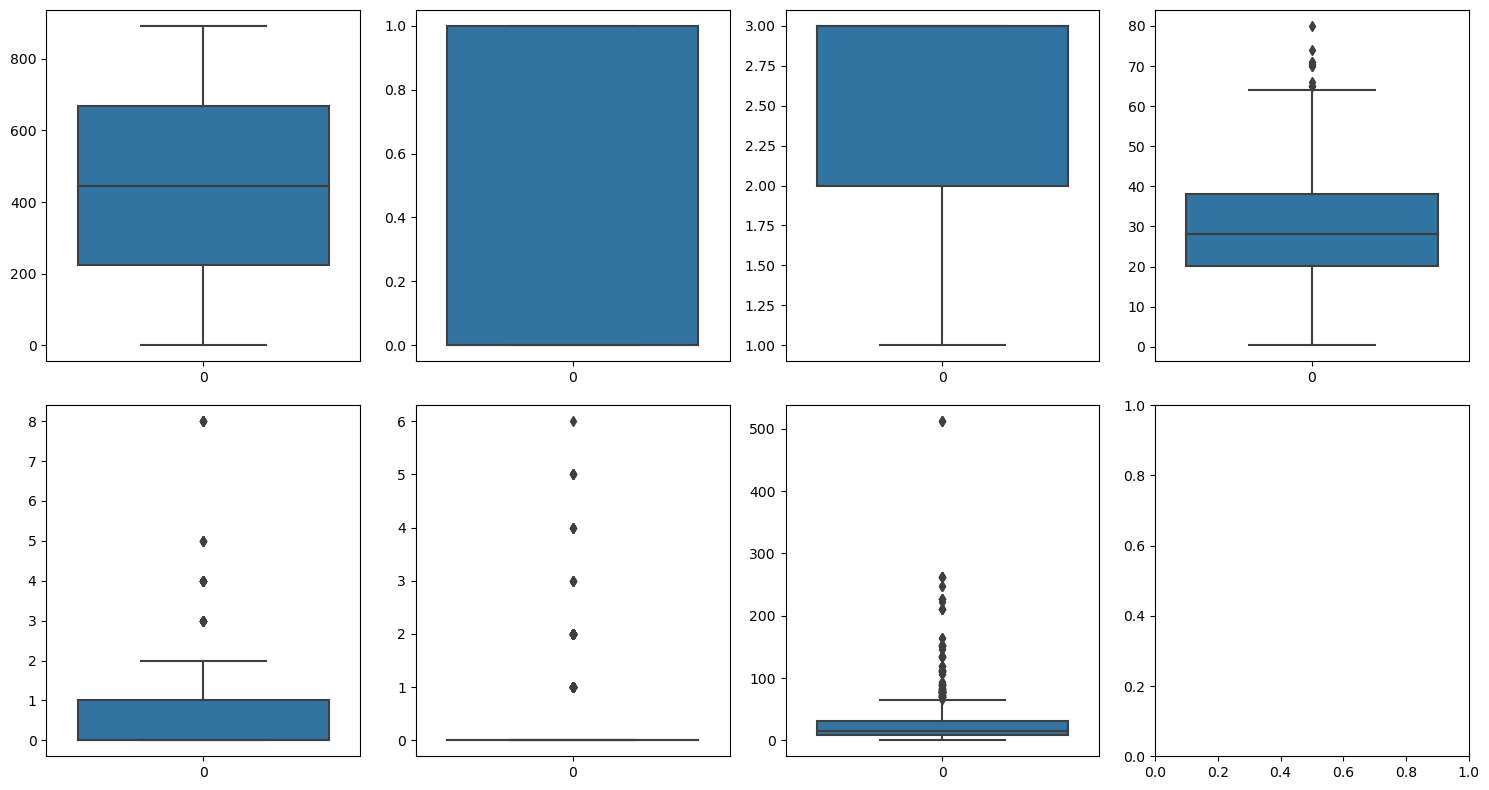

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))
for i, subplot in zip(n.columns, ax.flatten()):   
    sns.boxplot(n[i], ax = subplot)
plt.tight_layout()
plt.show()

In [19]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR =q3-q1
IQR

C:\Users\parth\AppData\Local\Temp\ipykernel_9228\3202828415.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=df.quantile(0.25)
C:\Users\parth\AppData\Local\Temp\ipykernel_9228\3202828415.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=df.quantile(0.75)


PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64

In [20]:
df1 = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df1

C:\Users\parth\AppData\Local\Temp\ipykernel_9228\604315930.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,B96 B98,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,B96 B98,Q


Nearly 35% outliers are present, therefore we consider them as geniune outliers

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Cleaning the data by removing irrelevant columns


In [23]:
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

Converting categorical to numerical columns

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
df['Sex']=le.fit_transform(df['Sex'])

In [27]:
df1=pd.get_dummies(df['Embarked'])

In [28]:
df=pd.concat([df,df1],axis=1)

In [29]:
df.drop('Embarked',axis=1,inplace=True)

Scaling the age and fare column to give equal weightage

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss=StandardScaler()

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [33]:
a=['Age','Fare']

In [34]:
df[a]=ss.fit_transform(df[a])

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,-0.565736,1,0,-0.502445,0,0,1
1,1,1,0,0.663861,1,0,0.786845,1,0,0
2,1,3,0,-0.258337,0,0,-0.488854,0,0,1
3,1,1,0,0.433312,1,0,0.420730,0,0,1
4,0,3,1,0.433312,0,0,-0.486337,0,0,1


In [36]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
C           1.595149
Q           2.948778
S          -1.009665
dtype: float64

Transforming the data which is highly skewed

In [37]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [38]:
b=['SibSp','Parch','Fare','C','Q','S']

In [39]:
df[b]=pt.fit_transform(df[b])

Visualization

<Axes: ylabel='Density'>

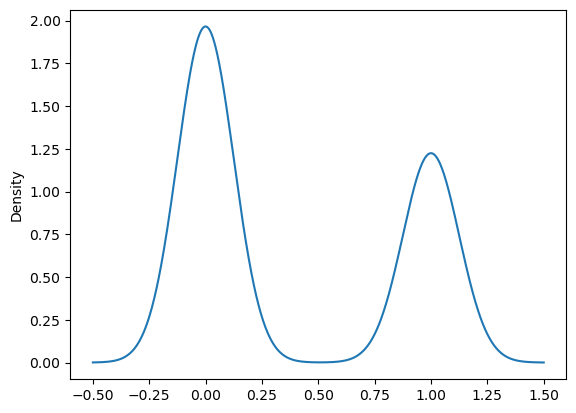

In [40]:
df['Survived'].plot(kind='kde')

Most of the members in titanic are coming under 'not survived'.

<Axes: ylabel='Density'>

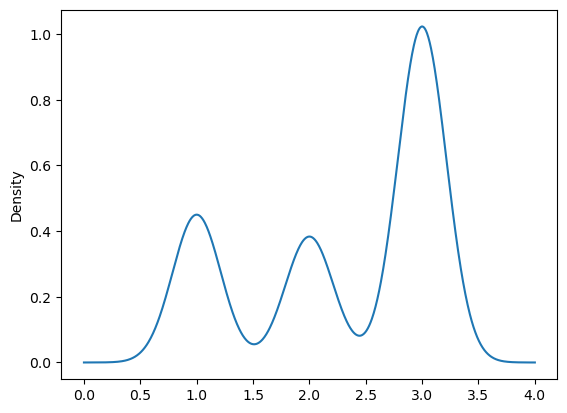

In [42]:
df['Pclass'].plot(kind='kde')

The Class 3 has a high density.

<Axes: ylabel='Density'>

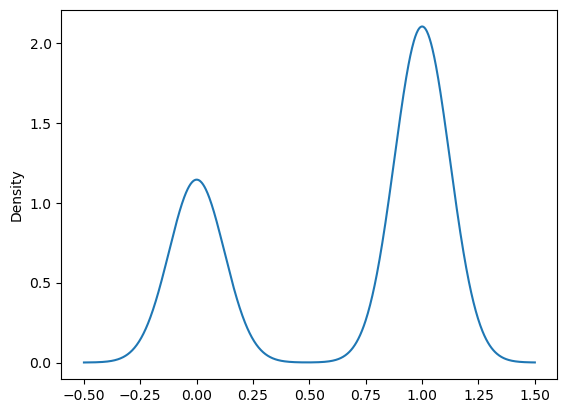

In [44]:
df['Sex'].plot(kind='kde')

Density of male is comparatively higher than female.

<Axes: ylabel='Density'>

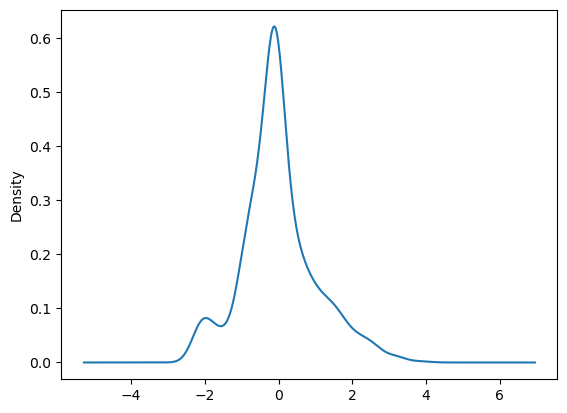

In [46]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

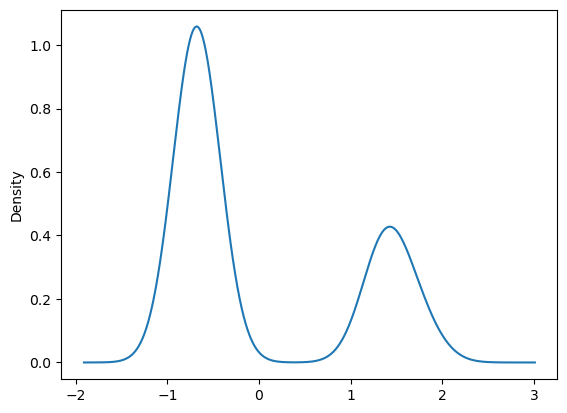

In [47]:
df['SibSp'].plot(kind='kde')

<Axes: ylabel='Density'>

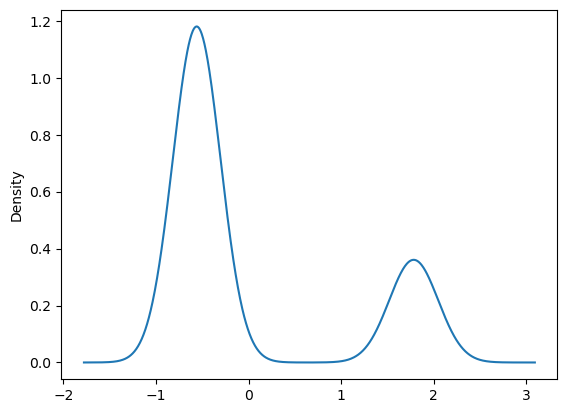

In [48]:
df['Parch'].plot(kind='kde')

<Axes: ylabel='Density'>

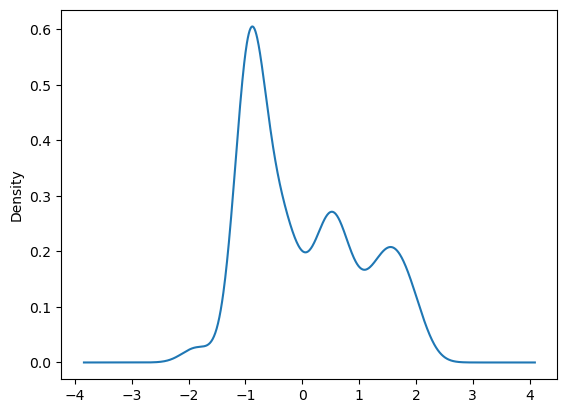

In [49]:
df['Fare'].plot(kind='kde')

<Axes: ylabel='Density'>

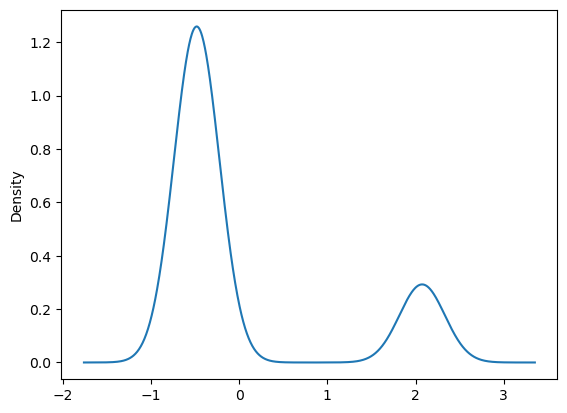

In [50]:
df['C'].plot(kind='kde')

<Axes: ylabel='Density'>

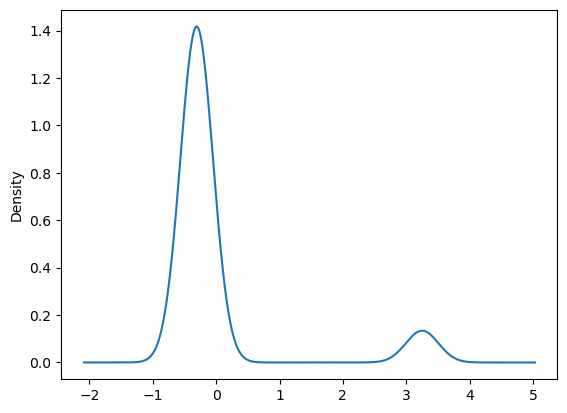

In [51]:
df['Q'].plot(kind='kde')

<Axes: ylabel='Density'>

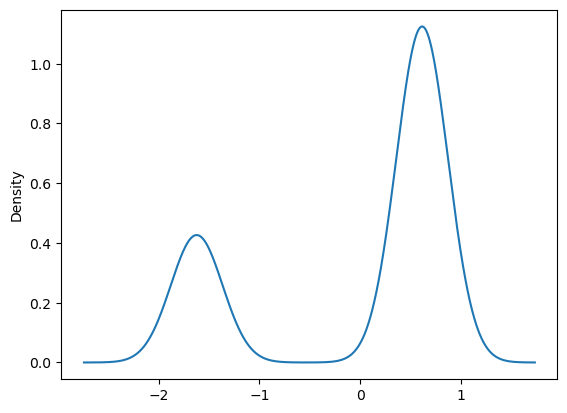

In [52]:
df['S'].plot(kind='kde')

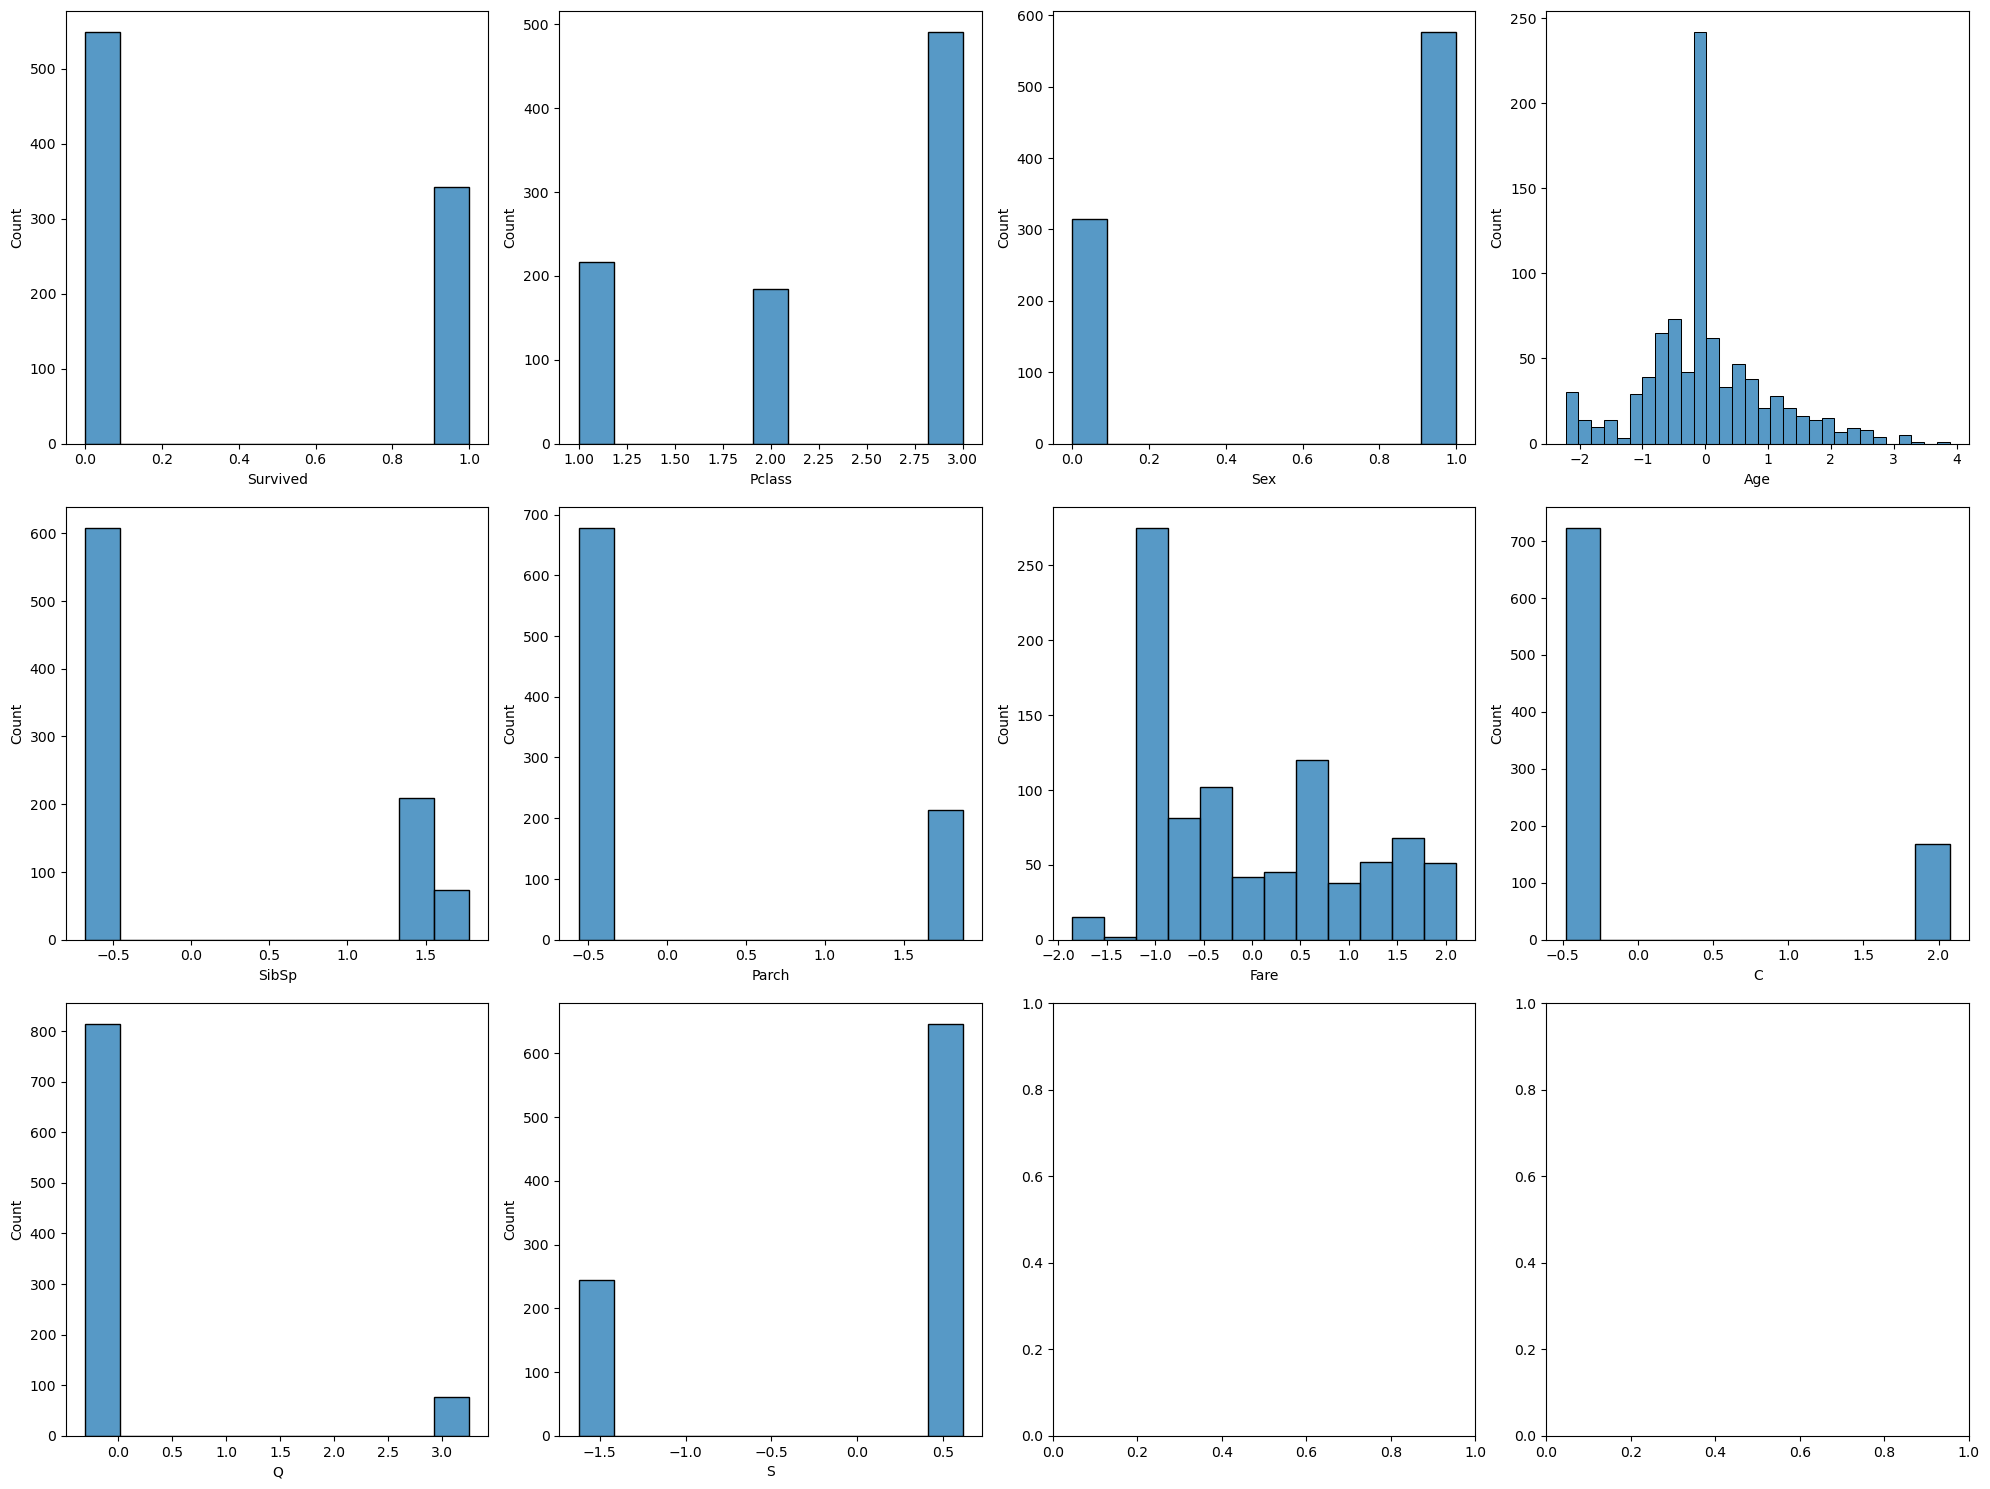

In [53]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(20, 15))
for i, subplot in zip(df.columns, ax.flatten()):   
    sns.histplot(df[i], ax = subplot)
plt.tight_layout()
plt.show()

<Axes: xlabel='SibSp', ylabel='Survived'>

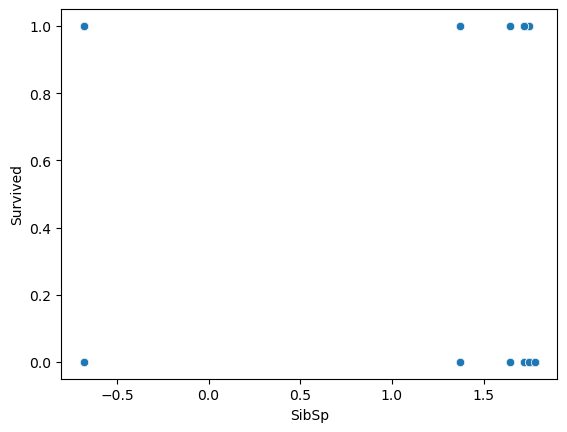

In [54]:
sns.scatterplot(x=df['SibSp'],y=df['Survived'])

There is no relationship between them. 

<Axes: xlabel='Pclass', ylabel='Survived'>

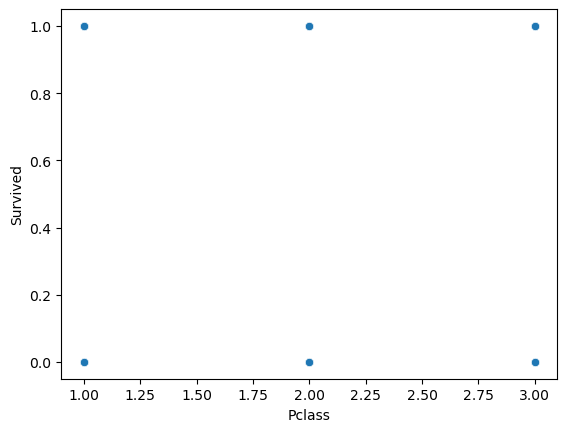

In [56]:
sns.scatterplot(x=df['Pclass'],y=df['Survived']) 

The is a good relation among other features with target variable.

<Axes: xlabel='Q', ylabel='Survived'>

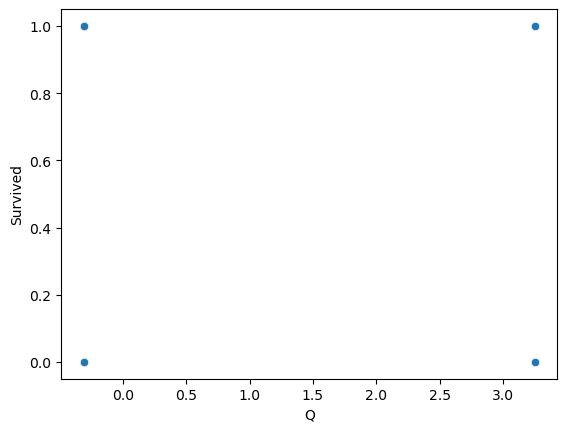

In [58]:
sns.scatterplot(x=df['Q'],y=df['Survived']) 

The relationship is very poor among others with target variable.

<Axes: >

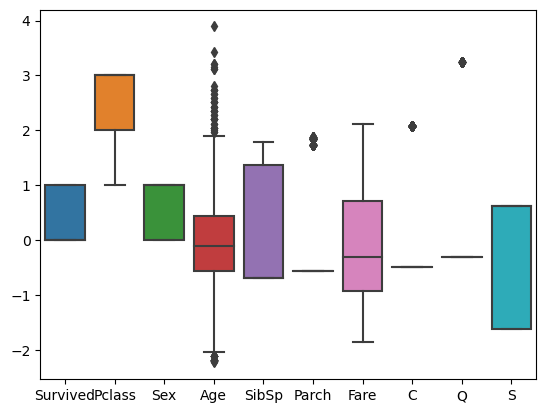

In [60]:
sns.boxplot(df)

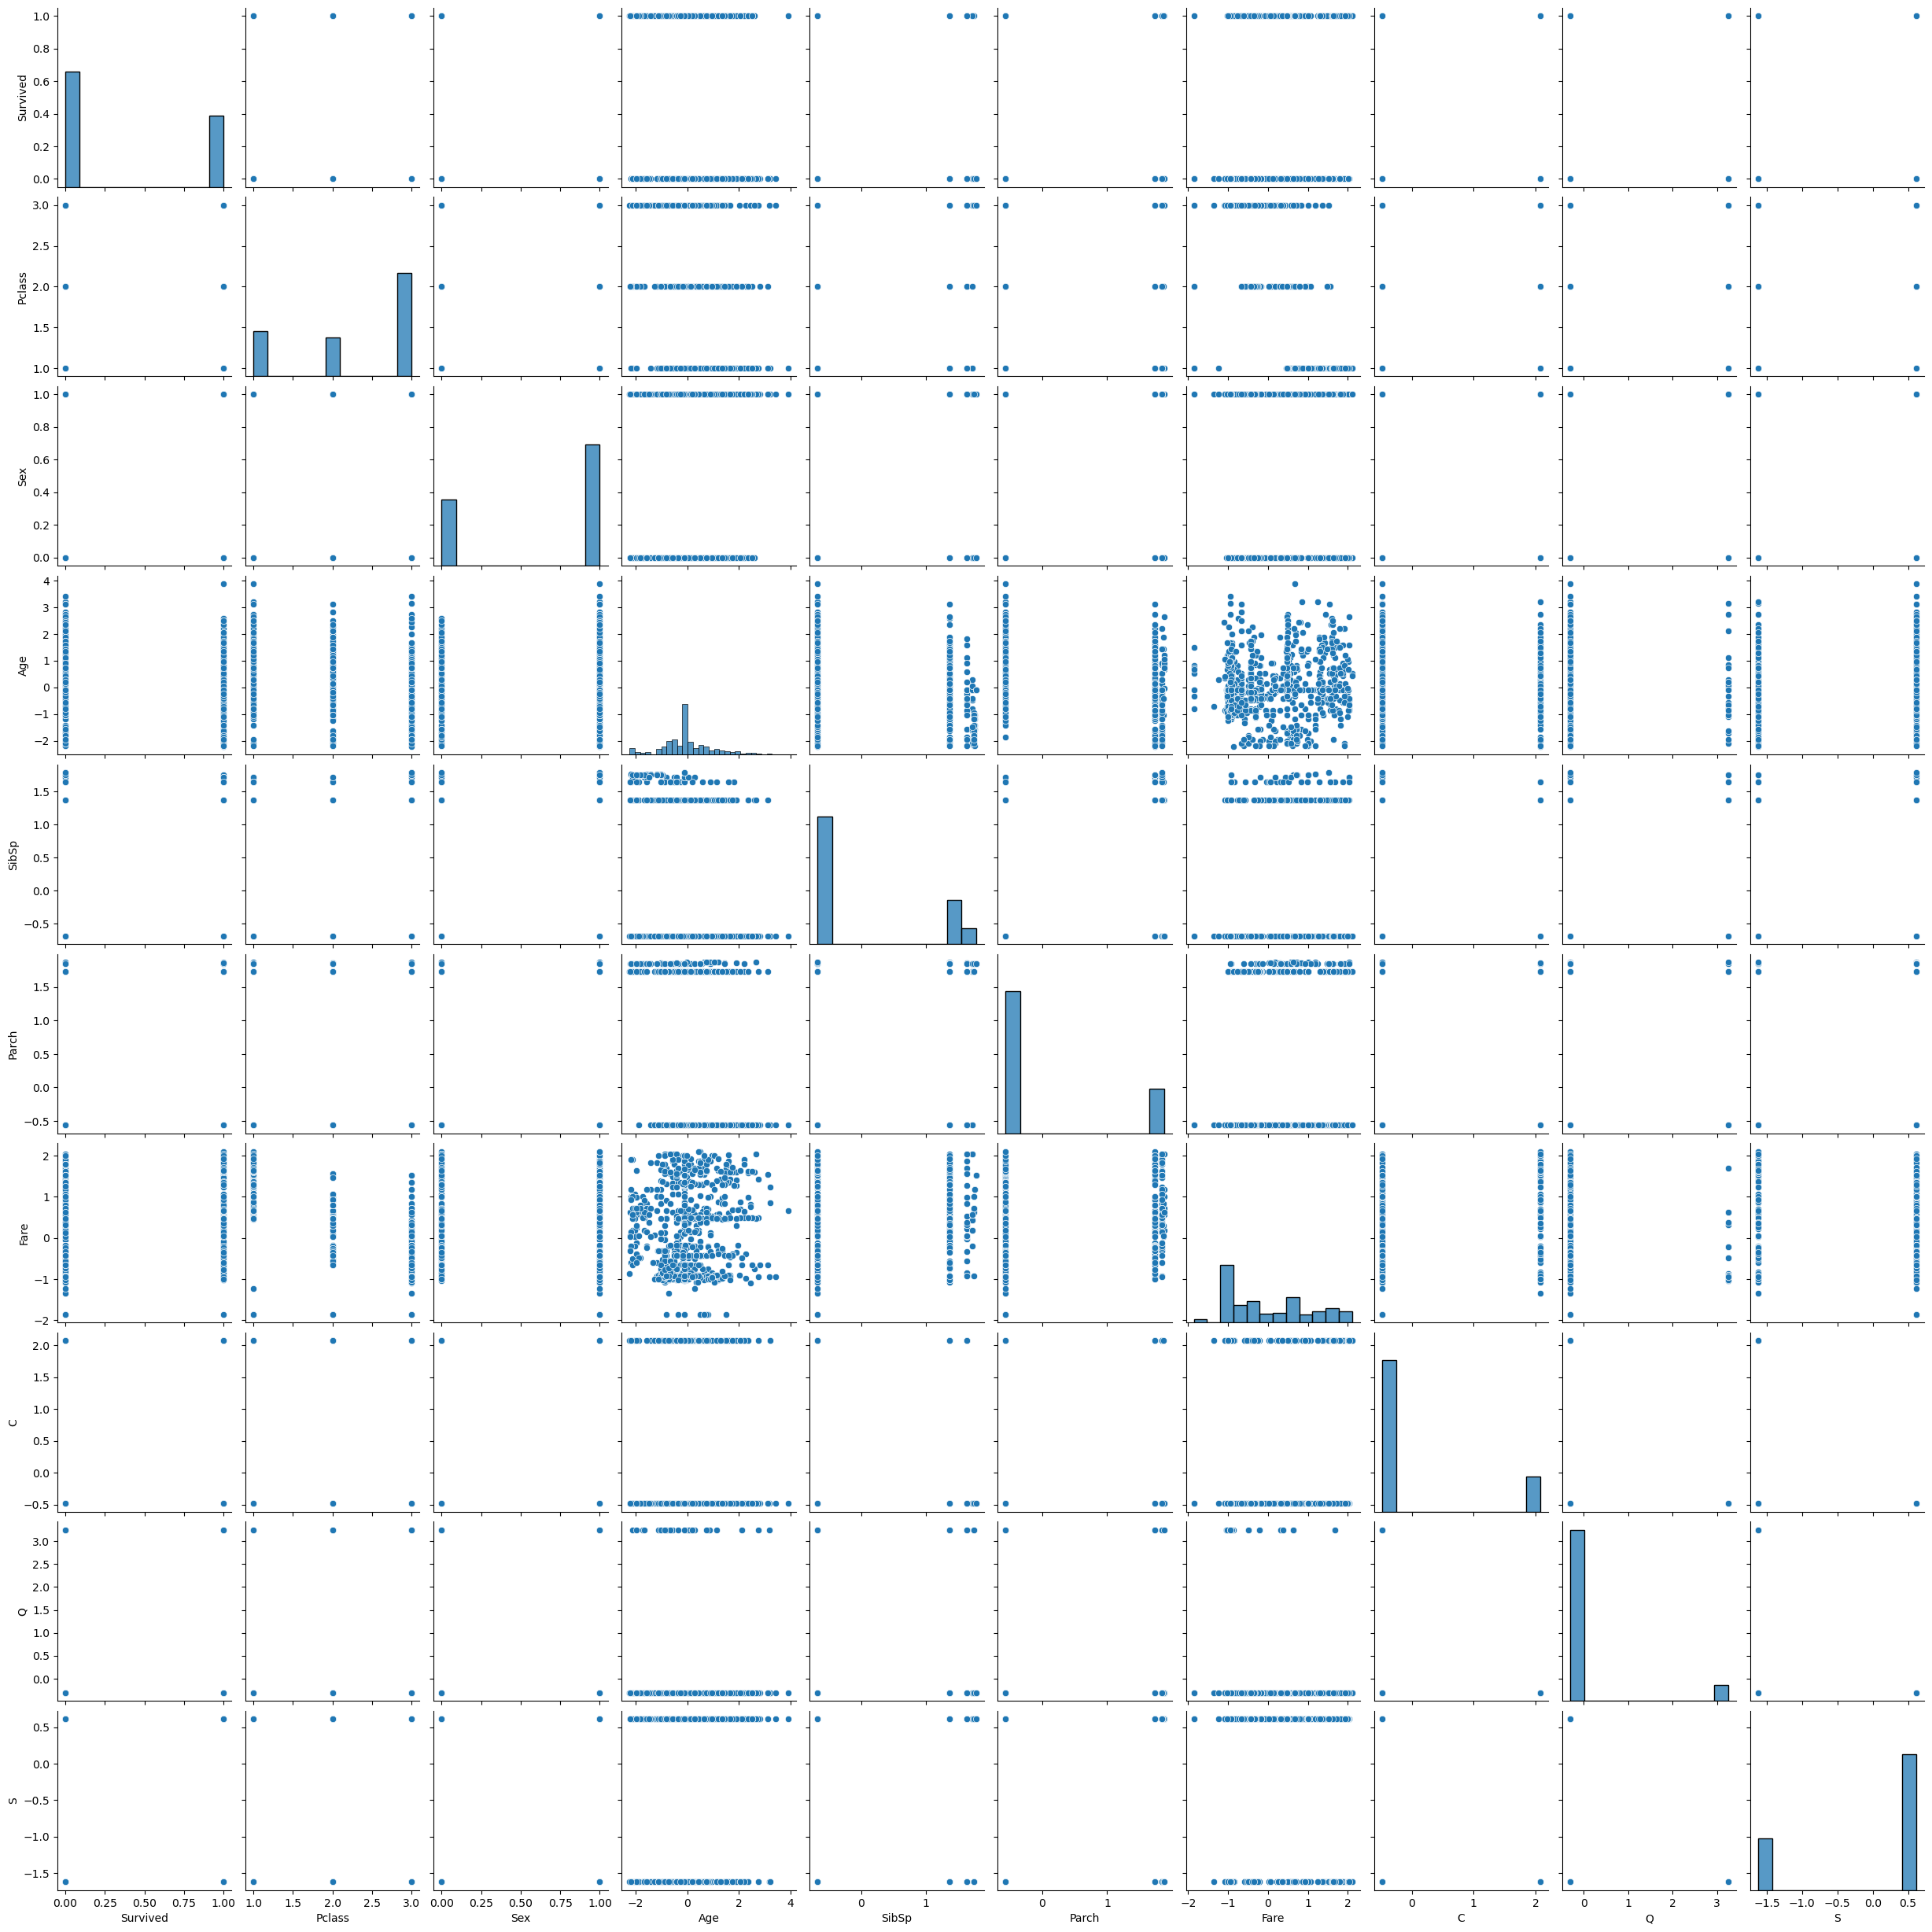

In [61]:
sns.pairplot(df)

The above graph shows the relationship between each features.

<Axes: >

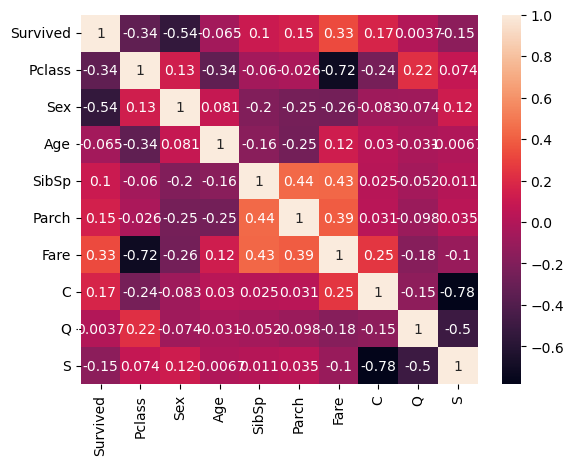

In [63]:
sns.heatmap(df.corr(),annot=True)

The Parch and Sibsp variables have strong relationship between them, whereas Pclass has the best relationship 
with the target variable.